##7장. 날짜와 시간 다루기 (colab에서 보시는 걸 추천)

### 교재에서는 판다스 시계열 도구로 설명

## 7.1 문자열을 날짜로 변환하기

--------------------------------------------------------------------------------

#### ※ 파이썬 날짜 타입 : 일반적으로 date, datetime, Timestamp가 사용됨
     - date, datetime : datetime 모듈, import datetime, int 값 인자
       datetime.date(2023, 8, 15)
       datetime.datetime(2023, 8, 15, 17, 24)
     - Timestamp : pandas 모듈, string 값 인자
       pd.Timestamp('2023-08-15T17:25:10')

     타입이 다르면 다르게 인식하기 때문에 같은 형식으로 사용하려면
     isoformat()이나 strftime(%Y%m%d)을 이용하여 string으로 바꾸어주던가...
     pd.to_datetime()으로 Timestamp형식으로 바꾸어주던가...

In [15]:
import datetime
import pandas as pd
print(datetime.date(2023, 8, 15))
print(datetime.datetime(2023, 8, 15))
print(type(datetime.date(2023, 8, 15)))
print(type(datetime.datetime(2023, 8, 15)))

2023-08-15
2023-08-15 00:00:00
<class 'datetime.date'>
<class 'datetime.datetime'>


##### isoformat()

In [17]:
datetime.date(2022,1,1).isoformat()
datetime.datetime(2022,1,1,21,19,24).isoformat()
pd.Timestamp('2022-01-01T21:19:34').isoformat()

'2022-01-01T21:19:34'

##### strftime()

In [19]:
datetime.date(2022,1,1).strftime('%Y-%m-%d')
datetime.datetime(2022,1,1,21,19,24).strftime('%Y-%m-%d')
pd.Timestamp('2022-01-01T21:19:34').strftime('%Y-%m-%d')

'2022-01-01'

In [20]:
print(type(pd.Timestamp('2022-01-01T21:19:34').strftime('%Y-%m-%d')))

<class 'str'>


pandas Timestamp 형식으로

In [ ]:
import datetime
import pandas as pd
print(type(datetime.datetime(2023, 8, 15, 17, 24)))
print(type(pd.Timestamp('2023-08-15T17:25:10')))

<class 'datetime.datetime'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
# datetime을 Timestamp 형식으로 변환
test_date = pd.to_datetime(datetime.datetime(2023, 8, 15, 17, 24))
print(test_date)
print(type(test_date))

2023-08-15 17:24:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


--------------------------------------------------------------------------------

### 문자열을 날짜로

In [ ]:
# 라이브러리를 임포트합니다.
import numpy as np
import pandas as pd

# # 문자열을 만듭니다.
# date_strings = np.array(['03-04-2005 11:35 PM',
#                          '23-05-2010 12:01 AM',
#                          '04-09-2009 09:09 PM'])

date_strings = np.array(['03-04-2005 11:35 aM',
                         '23-05-2010 12:01 am',
                         '04-09-2009 09:09 AM'])

# Timestamp 객체로 바꿉니다.
print([pd.to_datetime(date, format='%d-%m-%Y %I:%M %p') for date in date_strings])

[Timestamp('2005-04-03 11:35:00'), Timestamp('2010-05-23 00:01:00'), Timestamp('2009-09-04 09:09:00')]


#### ★ 참고 : format='%d-%m-%Y %I:%M %p' 대소문자 지켜줘야...

### 데이터 형식

In [ ]:
print(pd.to_datetime(date_strings, format='%d-%m-%Y %I:%M %p'))
print(pd.to_datetime(date_strings, format='%d-%m-%Y %I:%M %p')[0])
pd.to_datetime(date_strings, format='%d-%m-%Y %I:%M %p')[0]

DatetimeIndex(['2005-04-03 11:35:00', '2010-05-23 00:01:00',
               '2009-09-04 09:09:00'],
              dtype='datetime64[ns]', freq=None)
2005-04-03 11:35:00


Timestamp('2005-04-03 11:35:00')

### 판다스 Timestamp 형식으로 변환 예외 처리

In [ ]:
# error가 없는 경우
[pd.to_datetime(date, format="%d-%m-%Y %I:%M %p", errors="ignore") for date in date_strings]

[Timestamp('2005-04-03 11:35:00'),
 Timestamp('2010-05-23 00:01:00'),
 Timestamp('2009-09-04 09:09:00')]

In [ ]:
# error가 있을 경우
date_strings = np.array(['03-04-2005 11:35 aM',
                         '23-05-2010 13:01 am',       # error
                         '04-09-2009 09:09 AM'])

[pd.to_datetime(date, format="%d-%m-%Y %I:%M %p", errors="ignore") for date in date_strings]                      # 'ignore' 예외 발생시 그대로 출력

[Timestamp('2005-04-03 11:35:00'),
 '23-05-2010 13:01 am',
 Timestamp('2009-09-04 09:09:00')]

In [ ]:
[pd.to_datetime(date, format="%d-%m-%Y %I:%M %p", errors="raise") for date in date_strings]                       # errors의 기본값은 raise로 예외 발생

ValueError: ignored

In [ ]:
[pd.to_datetime(date, format="%d-%m-%Y %I:%M %p", errors="coerce") for date in date_strings]                        # 'coerce' 예외 발생시 NaT로 출력

[Timestamp('2005-04-03 11:35:00'), NaT, Timestamp('2009-09-04 09:09:00')]

#### ※ format이 달라도 에러

In [ ]:
[pd.to_datetime(date, format="%d-%m-%Y %I:%M:%S %p", errors="coerce") for date in date_strings]

[NaT, NaT, NaT]

##### ※ NaT : Not a Time(datetime에 알 수 없는 값이나 누락 값)

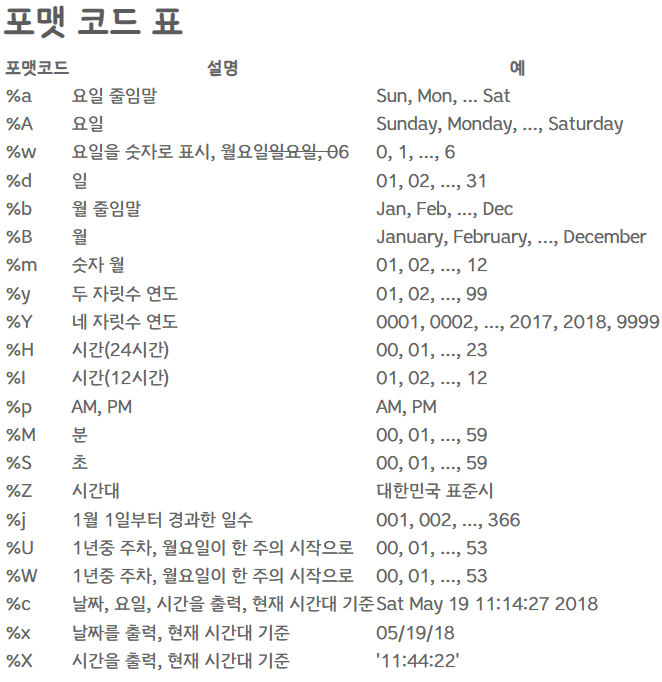

&nbsp;<br>

## 붙임

In [ ]:
# List comprehension없이 바로...
pd.to_datetime(date_strings)

DatetimeIndex(['2005-03-04 23:35:00', '2010-05-23 00:01:00',
               '2009-04-09 21:09:00'],
              dtype='datetime64[ns]', freq=None)

Datetimeindex 인덱스 사용 예제

In [ ]:
date_str = ["2018, 1, 1", "2018, 1, 4", "2018, 1, 5", "2018, 1, 6"]
idx = pd.to_datetime(date_str)
idx

np.random.seed(0)
s = pd.Series(np.random.randn(4), index=idx)
s

2018-01-01    1.764052
2018-01-04    0.400157
2018-01-05    0.978738
2018-01-06    2.240893
dtype: float64

&nbsp;<br>&nbsp;&nbsp;&nbsp;<br>

## 7.2 시간대 다루기

In [ ]:
import pandas as pd

# datetime을 만듭니다. tz 매개변수 사용
pd.Timestamp('2017-05-01 06:00:00', tz='Europe/London')

Timestamp('2017-05-01 06:00:00+0100', tz='Europe/London')

※ 참고 +0100 > 텍스트 및 XML 피드<br>
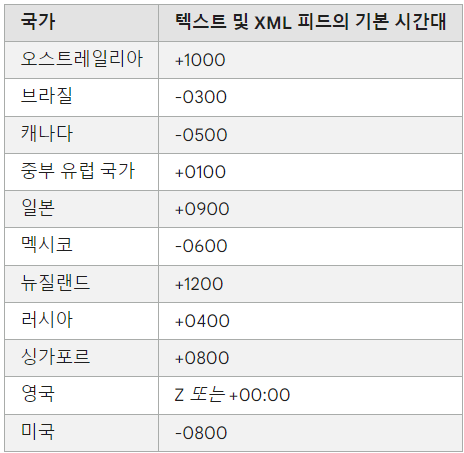

##### timestamp에 시간대 추가

In [ ]:
# datetime을 만듭니다.
date = pd.Timestamp('2017-05-01 06:00:00')

# 시간대를 지정합니다. tz_localize 메쏘드 사용
date_in_london = date.tz_localize('Europe/London')

# datetime을 확인합니다.
date_in_london

Timestamp('2017-05-01 06:00:00+0100', tz='Europe/London')

In [ ]:
date

Timestamp('2017-05-01 06:00:00')

##### 시간대 바꾸기

In [ ]:
# 시간대를 바꿉니다. tz_convert 메쏘드
date_in_london.tz_convert('Africa/Abidjan')

Timestamp('2017-05-01 05:00:00+0000', tz='Africa/Abidjan')

##### Series 모든 원소에 시간대 설정 가능

In [22]:
# 세 개의 날짜를 만듭니다.
dates = pd.Series(pd.date_range('2/2/2002', periods=3, freq='M'))               # freq에서 'M'은 월별 말일을 의미
dates

0   2002-02-28
1   2002-03-31
2   2002-04-30
dtype: datetime64[ns]

In [23]:
# 시간대를 지정합니다.
dates.dt.tz_localize('Africa/Abidjan')                                          # dt 연산자 사용

0   2002-02-28 00:00:00+00:00
1   2002-03-31 00:00:00+00:00
2   2002-04-30 00:00:00+00:00
dtype: datetime64[ns, Africa/Abidjan]

※ dt 연산자 사용 예시 : year, month, day, hour, minute, second, dayofweek, day-name 등 추출 가능<br>
★dt 연산자는 pandas.Series에서만...

In [24]:
new_dates = dates.to_frame()
new_dates.rename(columns= {0:'DateTime'}, inplace=True)
print(type(new_dates['DateTime']))
new_dates['year'] = new_dates.DateTime.dt.year
new_dates

<class 'pandas.core.series.Series'>


,DateTime,year
0,2002-02-28,2002
1,2002-03-31,2002
2,2002-04-30,2002


In [25]:
type(new_dates)

pandas.core.frame.DataFrame

##### ※ 예시

In [ ]:
df = pd.DataFrame({'Birth':['2019-01-01 09:10:00',
                            '2019-01-08 09:20:30',
                            '2019-02-01 10:20:00',
                            '2019-02-02 11:40:50',
                            '2019-02-28 15:10:20',
                            '2019-04-10 19:20:50',
                            '2019-06-30 21:20:50',
                            '2019-07-20 23:30:59']})

In [ ]:
df1 = pd.to_datetime(df['Birth'])
df1

0   2019-01-01 09:10:00
1   2019-01-08 09:20:30
2   2019-02-01 10:20:00
3   2019-02-02 11:40:50
4   2019-02-28 15:10:20
5   2019-04-10 19:20:50
6   2019-06-30 21:20:50
7   2019-07-20 23:30:59
Name: Birth, dtype: datetime64[ns]

In [ ]:
df1.dt.date

0    2019-01-01
1    2019-01-08
2    2019-02-01
3    2019-02-02
4    2019-02-28
5    2019-04-10
6    2019-06-30
7    2019-07-20
Name: Birth, dtype: object

In [ ]:
df2 = pd.DataFrame(df1)
df2

,Birth
0,2019-01-01 09:10:00
1,2019-01-08 09:20:30
2,2019-02-01 10:20:00
3,2019-02-02 11:40:50
4,2019-02-28 15:10:20
5,2019-04-10 19:20:50
6,2019-06-30 21:20:50
7,2019-07-20 23:30:59


In [ ]:
df2.dt.date

AttributeError: ignored

In [ ]:
df2.loc[0].dt.date

Birth    2019-01-01
Name: 0, dtype: object

##### 시간대 라이브러리 사용 : pytz 라이브러리 사용 권장
##### 참고 : https://edykim.com/ko/post/pytz-python-library-for-world-time-zone-definition/

In [ ]:
# 라이브러리를 임포트합니다.
from pytz import all_timezones

# 두 개의 시간대를 확인합니다.
all_timezones[0:10]

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Asmera',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau']

In [ ]:
from pytz import common_timezones
'US/Eastern' in common_timezones

True

※ 교재 설명

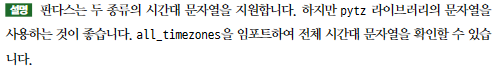

두 종류의 시간대 문자열 ???<br>
→ datetutil vs pytz &nbsp; &nbsp;&nbsp;   cf. maya<br>
→ UTC vs LMT

##### ※ 시간대   
   - UTC(Coordinated Universal Time) vs GMT(Greenwich Mean Time) vs LMT(Local Mean Time)<br>
     : 국가/지역별 시간대의 국제 표준인 UTC는 GMT로 불리기도 하는데 UTC와 GMT는 초의 소숫점 단위에서 차이가 남<br>
     ex) 한국, 일본, 호주 가운데 지역 : UTC+9hour<br>
     : LMT는 현지 시각을 의미한다고 생각하면 됨. KST, UST, PST 등<br>
   - PST(태평양 표준시, UTC-8) vs CST(북미 중앙 표준시, UTC-5) vs EST(북미 동부 표준시, UTC-6)    cf) KST<br>
   - 동부일광절약시(EDT, Eastern Daylight Time, 봄/여름) vs 동부표준시(EST, 가을, 겨울)

※ naive datetime(timezone 정보 없는 경우) vs aware datetime(timezone 정보 있는 경우)      *이런게 있다는 것만 일단 알아놓으시고...
  - naive : dt.datetime.now()
  - aware : dt.datetime.now(gettz('Asia/Seoul'))

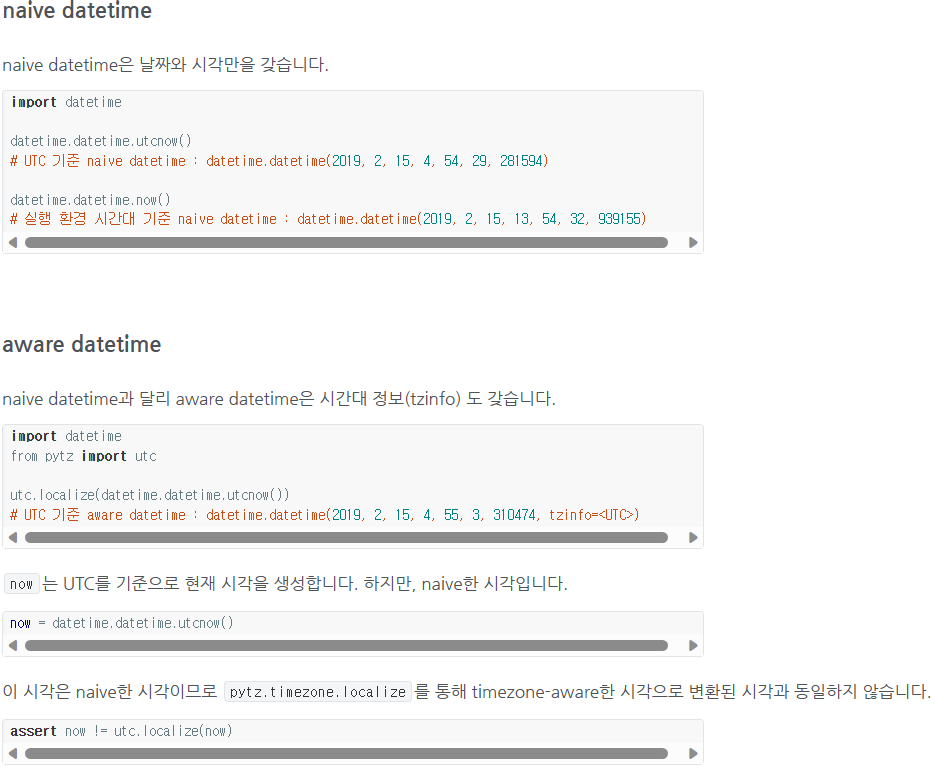

&nbsp;

## 붙임 : dateutil 문자열을 사용하는 방법도 있음

In [ ]:
dates.dt.tz_localize('dateutil/Aisa/Seoul')                                     # datetutil package 설치? import dateutil ?
                                                                                # from dateutil.parser import parse 와 같이 특정 객체를 사용 가능 *문자열로부터 날짜 패턴을 자동으로 인식하여 datetime 객체로 변환

0   2002-02-28
1   2002-03-31
2   2002-04-30
dtype: datetime64[ns]

In [27]:
dates

0   2002-02-28
1   2002-03-31
2   2002-04-30
dtype: datetime64[ns]

In [29]:
import pytz

tz = pytz.timezone('Asia/Seoul')
dates.dt.tz_localize(tz)

0   2002-02-28 00:00:00+09:00
1   2002-03-31 00:00:00+09:00
2   2002-04-30 00:00:00+09:00
dtype: datetime64[ns, Asia/Seoul]

In [32]:
a=dates.dt.tz_localize(tz)
b=dates.dt.tz_localize('Asia/Seoul')
print(a)
print(b)

0   2002-02-28 00:00:00+09:00
1   2002-03-31 00:00:00+09:00
2   2002-04-30 00:00:00+09:00
dtype: datetime64[ns, Asia/Seoul]
0   2002-02-28 00:00:00+09:00
1   2002-03-31 00:00:00+09:00
2   2002-04-30 00:00:00+09:00
dtype: datetime64[ns, Asia/Seoul]


In [34]:
tz == 'Asia/Seoul'

False

In [35]:
tz

<DstTzInfo 'Asia/Seoul' LMT+8:28:00 STD>

In [ ]:
# for time_zone in pytz.all_timezones:
#   print(time_zone)

&nbsp;

## 7.3 날짜와 시간 선택 *데이터 랭글링 방법(불리언 조건, 인덱스 슬라이싱)

In [ ]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터프레임을 만듭니다.
dataframe = pd.DataFrame()

# datetime을 만듭니다.
dataframe['date'] = pd.date_range('1/1/2001', periods=100000, freq='H')         # 2001년 1월 1일 00시 부터 1시간 간격으로 datetime 생성

# 두 datetime 사이의 샘플을 선택합니다.
dataframe[(dataframe['date'] > '2002-1-1 01:00:00') &
          (dataframe['date'] <= '2002-1-1 04:00:00')]

,date
8762,2002-01-01 02:00:00
8763,2002-01-01 03:00:00
8764,2002-01-01 04:00:00


In [ ]:
dataframe.head(3)

,date
0,2001-01-01 00:00:00
1,2001-01-01 01:00:00
2,2001-01-01 02:00:00


In [ ]:
dataframe.iloc[0][0]

Timestamp('2001-01-01 00:00:00')

In [ ]:
# 인덱스를 설정합니다.
dataframe = dataframe.set_index(dataframe['date'])

# 두 datetime 사이 샘플을 선택합니다.
dataframe.loc['2002-1-1 01:00:00':'2002-1-1 04:00:00']

,date
date,
2002-01-01 01:00:00,2002-01-01 01:00:00
2002-01-01 02:00:00,2002-01-01 02:00:00
2002-01-01 03:00:00,2002-01-01 03:00:00
2002-01-01 04:00:00,2002-01-01 04:00:00


## 7.4 날짜 데이터를 여러 특성으로 나누기<br>
##### Series.dt 시간 속성 사용(series의 datetimelike 속성을 접근하는 방법)

In [ ]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터프레임을 만듭니다.
dataframe = pd.DataFrame()

# 다섯 개의 날짜를 만듭니다.
dataframe['date'] = pd.date_range('1/1/2001', periods=150, freq='W')            # 2001년 1월 1일부터 1주 간격으로 150개 datetime 생성
print(type(dataframe))
print(type(dataframe['date']))
# 년, 월, 일, 시, 분에 대한 특성을 만듭니다.
dataframe['year'] = dataframe['date'].dt.year
dataframe['month'] = dataframe['date'].dt.month
dataframe['day'] = dataframe['date'].dt.day
dataframe['hour'] = dataframe['date'].dt.hour
dataframe['minute'] = dataframe['date'].dt.minute

# 세 개의 행을 확인합니다.
dataframe.head(3)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


,date,year,month,day,hour,minute
0,2001-01-07,2001,1,7,0,0
1,2001-01-14,2001,1,14,0,0
2,2001-01-21,2001,1,21,0,0


## 7.5 날짜 간의 차이를 계산하기<br>
##### 샘플 간의 datetime 사이의 차이...

In [37]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터프레임을 만듭니다.
dataframe = pd.DataFrame()

# 두 datetime 특성을 만듭니다.
dataframe['Arrived'] = [pd.Timestamp('01-01-2017'), pd.Timestamp('01-04-2017')]
dataframe['Left'] = [pd.Timestamp('01-01-2017'), pd.Timestamp('01-06-2017')]

# 특성 사이의 차이를 계산합니다.
dataframe['Left'] - dataframe['Arrived']                                        # timedelta object

0   0 days
1   2 days
dtype: timedelta64[ns]

In [38]:
# 특성 간의 기간을 계산합니다.
pd.Series(delta.days for delta in (dataframe['Left'] - dataframe['Arrived']))

0    0
1    2
dtype: int64

##### ※ timedelta object는 아래와 같은데
##### class datetime.timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)
##### - timedelta instance attribute : days, seconds, microseconds 뿐 임

In [46]:
date_diff = dataframe['Left'] - dataframe['Arrived']
print(type(dataframe['Left'][0]))
print(type(date_diff[0]))                                                       # date_diff는 pd.series이지만 인스턴스들은 Timedelta 타입

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timedeltas.Timedelta'>


In [47]:
date_diff

0   0 days
1   2 days
dtype: timedelta64[ns]

In [ ]:
pd.Series(delta.seconds for delta in (dataframe['Left'] - dataframe['Arrived']))

0    0
1    0
dtype: int64

In [ ]:
pd.Series(delta.hours for delta in (dataframe['Left'] - dataframe['Arrived']))

AttributeError: ignored

##### - timedelta class attribute : min(가장 음수인 timedelta 객체), max(가장 양수인 timedelta 객체), resolution(timedelta 간의 가장 작은 차이, 1 microsec)

In [ ]:
print(date_diff[0].min)
print(date_diff[0].max)
print(date_diff[0].resolution)

-106752 days +00:12:43.145224193
106751 days 23:47:16.854775807
0 days 00:00:00.000000001


##### - timedelta instance methods : total_seconds()

In [ ]:
pd.Series(delta.total_seconds() for delta in (dataframe['Left'] - dataframe['Arrived']))

0         0.0
1    172800.0
dtype: float64

## ※ https://bit.ly/2W04StT
## ※ ISO8601 :  날짜와 시간과 관련된 데이터 교환을 다루는 국제 표준. 목적은 날짜와 시간을 표현함에 있어 명백하고 잘 정의된 방법을 제공함으로써, 날짜와 시간의 숫자 표현에 대한 오해를 줄이고자함

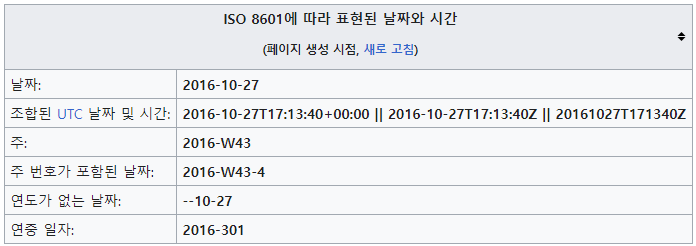

## 7.6 요일을 인코딩하기
##### Series.dt weekday_name 속성 사용

In [49]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 시리즈 객체를 만듭니다.
dates = pd.Series(pd.date_range("2/2/2002", periods=7, freq="D"))

# 요일을 확인합니다.
dates.dt.day_name()

0     Saturday
1       Sunday
2       Monday
3      Tuesday
4    Wednesday
5     Thursday
6       Friday
dtype: object

In [50]:
# 요일을 확인합니다. 수치형 값으로 출력 ex) Monday : 0 ~ Sunday : 6
dates.dt.weekday

0    5
1    6
2    0
3    1
4    2
5    3
6    4
dtype: int64

In [52]:
dates.dt.dayofweek

0    5
1    6
2    0
3    1
4    2
5    3
6    4
dtype: int64

In [53]:
dates.dt.weekday== dates.dt.dayofweek

0    True
1    True
2    True
3    True
4    True
5    True
6    True
dtype: bool

# ※Pandas Series Datetimelike 속성 : http://pandas.pydata.org/pandas-docs/stable/reference/series.html#datetimelike-properties

## 7.7 시차 특성 만들기
##### n 기간 만큼 차이가 나는 시차 특성(lagged feature)
##### → 판다스 shift 사용

In [ ]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터프레임을 만듭니다.
dataframe = pd.DataFrame()

# 날짜를 만듭니다.
dataframe["dates"] = pd.date_range("1/1/2001", periods=5, freq="D")
dataframe["stock_price"] = [1.1,2.2,3.3,4.4,5.5]                                # 주식 가격 예시로 사용하고 싶어한 듯

# 한 행 뒤의 값을 가져옵니다.
dataframe["previous_days_stock_price"] = dataframe["stock_price"].shift(2)      # 2일 전 데이터

# 데이터프레임을 확인합니다.
dataframe

,dates,stock_price,previous_days_stock_price
0,2001-01-01,1.1,NaN
1,2001-01-02,2.2,NaN
2,2001-01-03,3.3,1.1
3,2001-01-04,4.4,2.2
4,2001-01-05,5.5,3.3


## 7.8 이동 시간 윈도 사용하기
##### 일정 시간 간격으로 통계를 계산할 때

In [ ]:
# 라이브러리를 임포트합니다.
import pandas as pd

# datetime을 만듭니다.
time_index = pd.date_range("01/01/2010", periods=5, freq="M")

# 데이터프레임을 만들고 인덱스를 설정합니다.
dataframe = pd.DataFrame(index=time_index)

# 특성을 만듭니다.
dataframe["Stock_Price"] = [1,2,3,4,5]

# 이동 평균을 계산합니다.
dataframe.rolling(window=2).mean()

,Stock_Price
2010-01-31,NaN
2010-02-28,1.5
2010-03-31,2.5
2010-04-30,3.5
2010-05-31,4.5


판다스의 rolling 메소드는 window 매개변수에서 윈도우 크기를 지정<br>
max(), mean(), count(), corr() 등 통계를 윈도우 별로 간편하게 계산 가능

## 붙임

### exponential moving widnow : 최근 항목에 높은 가중치를 두지만 전체 기간에 대한 통계를 계산<br>
참고 : https://wikidocs.net/152787

## 지수 이동 평균은 시계열 데이터 분석에 중요한 개념이므로 통계 강의에서 다뤄지길 기대합니다.
## 여기서는 간단히 뭔지만 보고 넘어가는게...

In [ ]:
dataframe.ewm(alpha=0.5).mean()

,Stock_Price
2010-01-31,1.000000
2010-02-28,1.666667
2010-03-31,2.428571
2010-04-30,3.266667
2010-05-31,4.161290


    index   val
0       0   1.0
1       1   4.0
2       2   2.0
3       3   3.0
4       4   2.0
5       5   5.0
6       6  13.0
7       7  10.0
8       8  12.0
9       9  14.0
10     10   NaN
11     11  16.0
12     12  12.0
13     13  20.0
14     14  22.0


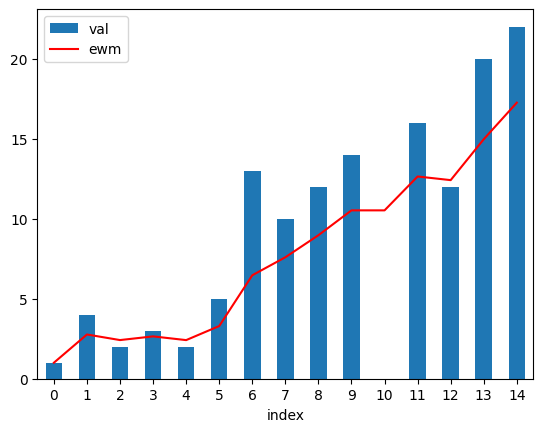

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = {'val':[1,4,2,3,2,5,13,10,12,14,np.NaN,16,12,20,22]}
df = pd.DataFrame(data).reset_index()
print(df)
df2 = df.assign(ewm=df['val'].ewm(alpha=0.3).mean()) # val열에 ewm 메서드적용 후 df에 추가
ax = df.plot(kind='bar',x='index',y='val') # ax에 df의 bar chart 생성
ax2= df2.plot(kind='line',x='index', y='ewm', color='red', ax=ax) # ax2에 df2의 line chart 생성후 ax에 추가
plt.show() # 그래프 출력

## 7.9 시계열 데이터에서 누락된 값 다루기

In [ ]:
# 라이브러리를 임포트합니다.
import pandas as pd
import numpy as np

# 날짜를 만듭니다.
time_index = pd.date_range("01/01/2010", periods=5, freq="M")

# 데이터프레임을 만들고 인덱스를 지정합니다.
dataframe = pd.DataFrame(index=time_index)

# 누락된 값이 있는 특성을 만듭니다.
dataframe["Sales"] = [1.0,2.0,np.nan,np.nan,5.0]
dataframe

,Sales
2010-01-31,1.0
2010-02-28,2.0
2010-03-31,NaN
2010-04-30,NaN
2010-05-31,5.0


In [ ]:
# 누락된 값을 보간합니다.
dataframe.interpolate()

,Sales
2010-01-31,1.0
2010-02-28,2.0
2010-03-31,3.0
2010-04-30,4.0
2010-05-31,5.0


In [ ]:
# 앞쪽으로 채우기(Forward-fill)
dataframe.ffill()

,Sales
2010-01-31,1.0
2010-02-28,2.0
2010-03-31,2.0
2010-04-30,2.0
2010-05-31,5.0


In [ ]:
# 뒤쪽으로 채우기(Back-fill)
dataframe.bfill()

,Sales
2010-01-31,1.0
2010-02-28,2.0
2010-03-31,5.0
2010-04-30,5.0
2010-05-31,5.0


#### interpolate()는 default로 interpolate(method='linear')로서 선형으로 비례하여 결측값을 보간
#### pandas.DataFrame.interpolate의 매개변수 설정에 따른 보간 방법 선택
##### 참고 : https://teddylee777.github.io/pandas/pandas-interpolation/ , https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html

In [ ]:
# 두 포인트 사이가 2차 비선형일 때 누락된 값을 보간하기
dataframe.interpolate(method="quadratic")

,Sales
2010-01-31,1.000000
2010-02-28,2.000000
2010-03-31,3.059808
2010-04-30,4.038069
2010-05-31,5.000000


In [ ]:
# 누락된 값의 간격이 커서 전체 간격을 보간하는 것이 좋지 않을 때
# limit : 보간 값 개수 제한
# limit_direction : 보간 방향, 앞쪽부터? 뒷쪽부터
dataframe.interpolate(limit=1, limit_direction="forward")

,Sales
2010-01-31,1.0
2010-02-28,2.0
2010-03-31,3.0
2010-04-30,NaN
2010-05-31,5.0


In [ ]:
dataframe.interpolate(limit=1, limit_direction="backward")

,Sales
2010-01-31,1.0
2010-02-28,2.0
2010-03-31,NaN
2010-04-30,4.0
2010-05-31,5.0
